In [1]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
import warnings
warnings.filterwarnings('ignore')

In [2]:
coldf=pd.read_csv('colData_GSE137140.csv',delimiter=';')
rowdf=pd.read_csv('rowData_GSE137140.csv',delimiter=';')
assaydf=pd.read_csv('assay_GSE137140.csv',delimiter=';')
display(coldf.head())
display(rowdf.head())
display(assaydf.head())

,Unnamed: 0,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,...,contact_address,contact_city,contact_zip.postal_code,contact_country,supplementary_file,data_row_count,age.ch1,disease.state.ch1,Sex.ch1,tissue.ch1
0,GSM4067570,BC0921,GSM4067570,Public on Mar 30 2020,Sep 09 2019,Mar 30 2020,RNA,1,Serum,Homo sapiens,...,kamakurashi,Kanagawa,248-8555,Japan,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4067...,2565,51.0,Non-cancer control,Female,serum
1,GSM4067571,BC0962,GSM4067571,Public on Mar 30 2020,Sep 09 2019,Mar 30 2020,RNA,1,Serum,Homo sapiens,...,kamakurashi,Kanagawa,248-8555,Japan,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4067...,2565,46.0,Non-cancer control,Female,serum
2,GSM4067572,BC0963,GSM4067572,Public on Mar 30 2020,Sep 09 2019,Mar 30 2020,RNA,1,Serum,Homo sapiens,...,kamakurashi,Kanagawa,248-8555,Japan,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4067...,2565,67.0,Non-cancer control,Female,serum
3,GSM4067573,BC0973,GSM4067573,Public on Mar 30 2020,Sep 09 2019,Mar 30 2020,RNA,1,Serum,Homo sapiens,...,kamakurashi,Kanagawa,248-8555,Japan,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4067...,2565,56.0,Non-cancer control,Female,serum
4,GSM4067574,BC0977,GSM4067574,Public on Mar 30 2020,Sep 09 2019,Mar 30 2020,RNA,1,Serum,Homo sapiens,...,kamakurashi,Kanagawa,248-8555,Japan,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4067...,2565,53.0,Non-cancer control,Female,serum


,Unnamed: 0,ID,miRNA,miRNA_ID_LIST
0,MIMAT0000062,MIMAT0000062,MIMAT0000062,hsa-let-7a-5p
1,MIMAT0000063,MIMAT0000063,MIMAT0000063,hsa-let-7b-5p
2,MIMAT0000064,MIMAT0000064,MIMAT0000064,hsa-let-7c-5p
3,MIMAT0000065,MIMAT0000065,MIMAT0000065,hsa-let-7d-5p
4,MIMAT0000066,MIMAT0000066,MIMAT0000066,hsa-let-7e-5p


,Unnamed: 0,GSM4067570,GSM4067571,GSM4067572,GSM4067573,GSM4067574,GSM4067575,GSM4067576,GSM4067577,GSM4067578,...,GSM4071484,GSM4071485,GSM4071486,GSM4071487,GSM4071488,GSM4071489,GSM4071490,GSM4071491,GSM4071492,GSM4071493
0,MIMAT0000062,"4,393091827","3,817743615","3,779668162","5,537472886","5,953740715","1,682941934","6,486690768","2,469667281","5,438338613",...,"-1,105000527","-0,744527358","4,703615175","-0,504938474","-0,447819666","-1,041623878","-1,107796005","-1,478146999","-0,660181295","-1,511058503"
1,MIMAT0000063,"6,306405454","-1,240935745","3,997012588","1,593297553","3,07389018","5,585973454","0,581152049","4,629925707","6,008346739",...,"-1,105000527","4,553650651","3,286193596","-0,504938474","-0,447819666","-1,041623878","-1,107796005","-1,478146999","4,04421089","-1,511058503"
2,MIMAT0000064,"5,736185613","3,740098159","0,503678265","3,843516133","0,853141306","4,333699602","4,175398812","-1,104550309","4,556129323",...,"-1,105000527","-0,744527358","3,121643619","-0,504938474","-0,447819666","-1,041623878","-1,107796005","-1,478146999","3,854959542","-1,511058503"
3,MIMAT0000065,"3,923084616","2,193073464","3,724792436","5,464835741","4,977866734","1,682941934","5,744840096","4,776691383","5,155604619",...,"-1,105000527","-0,744527358","-0,607801475","-0,504938474","-0,447819666","-1,041623878","-1,107796005","-1,478146999","-0,660181295","-1,511058503"
4,MIMAT0000066,"4,903123022","2,147514427","1,606391388","0,530398736","0,853141306","1,682941934","0,581152049","4,250007579","4,218558256",...,"-1,105000527","-0,744527358","1,804272753","-0,504938474","-0,447819666","-1,041623878","-1,107796005","-1,478146999","3,685818088","-1,511058503"


In [3]:
assaydf=assaydf.T
assaydf

,0,1,2,3,4,5,6,7,8,9,...,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
Unnamed: 0,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
GSM4067570,"4,393091827","6,306405454","5,736185613","3,923084616","4,903123022","-0,152745195","-0,152745195","-0,152745195","3,958536842","-0,152745195",...,"-0,152745195","-0,152745195","5,312395508","-0,152745195","-0,152745195","7,23987811","3,096797739","-0,152745195","-0,152745195","0,252978563"
GSM4067571,"3,817743615","-1,240935745","3,740098159","2,193073464","2,147514427","3,169063484","3,485990359","3,674214714","5,033755709","4,379048292",...,"-1,240935745","1,314120014","6,919165706","-1,240935745","-1,240935745","6,827426061","4,35825413","2,766291307","-1,240935745","-1,240935745"
GSM4067572,"3,779668162","3,997012588","0,503678265","3,724792436","1,606391388","3,2211602","2,860849652","4,332943347","4,093646598","3,982986494",...,"1,530600043","-1,353647319","6,632532105","-1,531526851","-1,531526851","5,173704913","4,844176936","1,14672538","-1,531526851","-1,531526851"
GSM4067573,"5,537472886","1,593297553","3,843516133","5,464835741","0,530398736","2,489050276","3,275916834","0,530398736","5,951552172","2,069957103",...,"5,404108354","0,530398736","7,903955558","4,832157199","0,530398736","6,444462463","4,290577626","0,530398736","4,570456073","4,11303482"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4071489,"-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878",...,"-1,041623878","-1,041623878","5,765011492","-1,041623878","-1,041623878","5,104660957","-1,041623878","-1,041623878","-1,041623878","-1,041623878"
GSM4071490,"-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005",...,"-1,107796005","-1,107796005","4,555224009","-1,107796005","-1,107796005","4,820332151","5,76615654","-1,107796005","-1,107796005","-1,107796005"
GSM4071491,"-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999",...,"-1,478146999","-1,478146999","7,017008951","-1,478146999","-1,478146999","4,67650152","5,347158646","2,964856525","-1,478146999","-1,200794233"
GSM4071492,"-0,660181295","4,04421089","3,854959542","-0,660181295","3,685818088","4,177810793","3,740344908","4,359406246","1,737257069","-0,660181295",...,"4,422161867","-0,660181295","6,54663468","-0,660181295","-0,660181295","6,993437317","5,845910251","5,59298428","-0,660181295","-0,660181295"


In [4]:
assaydf.columns=assaydf.iloc[0,:]
assaydf=assaydf[1:]
assaydf

Unnamed: 0,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
GSM4067570,"4,393091827","6,306405454","5,736185613","3,923084616","4,903123022","-0,152745195","-0,152745195","-0,152745195","3,958536842","-0,152745195",...,"-0,152745195","-0,152745195","5,312395508","-0,152745195","-0,152745195","7,23987811","3,096797739","-0,152745195","-0,152745195","0,252978563"
GSM4067571,"3,817743615","-1,240935745","3,740098159","2,193073464","2,147514427","3,169063484","3,485990359","3,674214714","5,033755709","4,379048292",...,"-1,240935745","1,314120014","6,919165706","-1,240935745","-1,240935745","6,827426061","4,35825413","2,766291307","-1,240935745","-1,240935745"
GSM4067572,"3,779668162","3,997012588","0,503678265","3,724792436","1,606391388","3,2211602","2,860849652","4,332943347","4,093646598","3,982986494",...,"1,530600043","-1,353647319","6,632532105","-1,531526851","-1,531526851","5,173704913","4,844176936","1,14672538","-1,531526851","-1,531526851"
GSM4067573,"5,537472886","1,593297553","3,843516133","5,464835741","0,530398736","2,489050276","3,275916834","0,530398736","5,951552172","2,069957103",...,"5,404108354","0,530398736","7,903955558","4,832157199","0,530398736","6,444462463","4,290577626","0,530398736","4,570456073","4,11303482"
GSM4067574,"5,953740715","3,07389018","0,853141306","4,977866734","0,853141306","6,203541427","0,853141306","0,853141306","0,853141306","6,480173851",...,"0,853141306","3,142655137","8,3618247","0,853141306","0,853141306","3,301567446","0,853141306","0,853141306","0,853141306","0,853141306"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4071489,"-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878","-1,041623878",...,"-1,041623878","-1,041623878","5,765011492","-1,041623878","-1,041623878","5,104660957","-1,041623878","-1,041623878","-1,041623878","-1,041623878"
GSM4071490,"-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005","-1,107796005",...,"-1,107796005","-1,107796005","4,555224009","-1,107796005","-1,107796005","4,820332151","5,76615654","-1,107796005","-1,107796005","-1,107796005"
GSM4071491,"-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999","-1,478146999",...,"-1,478146999","-1,478146999","7,017008951","-1,478146999","-1,478146999","4,67650152","5,347158646","2,964856525","-1,478146999","-1,200794233"
GSM4071492,"-0,660181295","4,04421089","3,854959542","-0,660181295","3,685818088","4,177810793","3,740344908","4,359406246","1,737257069","-0,660181295",...,"4,422161867","-0,660181295","6,54663468","-0,660181295","-0,660181295","6,993437317","5,845910251","5,59298428","-0,660181295","-0,660181295"


In [5]:
label_df=coldf[["geo_accession","disease.state.ch1"]]
label_df.head()

,geo_accession,disease.state.ch1
0,GSM4067570,Non-cancer control
1,GSM4067571,Non-cancer control
2,GSM4067572,Non-cancer control
3,GSM4067573,Non-cancer control
4,GSM4067574,Non-cancer control


In [6]:
coldf.shape

(3924, 38)

In [7]:
assaydf.index.name="geo_accession"
assaydf.head()

Unnamed: 0,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
geo_accession,,,,,,,,,,,,,,,,,,,,,
GSM4067570,"4,393091827","6,306405454","5,736185613","3,923084616","4,903123022","-0,152745195","-0,152745195","-0,152745195","3,958536842","-0,152745195",...,"-0,152745195","-0,152745195","5,312395508","-0,152745195","-0,152745195","7,23987811","3,096797739","-0,152745195","-0,152745195","0,252978563"
GSM4067571,"3,817743615","-1,240935745","3,740098159","2,193073464","2,147514427","3,169063484","3,485990359","3,674214714","5,033755709","4,379048292",...,"-1,240935745","1,314120014","6,919165706","-1,240935745","-1,240935745","6,827426061","4,35825413","2,766291307","-1,240935745","-1,240935745"
GSM4067572,"3,779668162","3,997012588","0,503678265","3,724792436","1,606391388","3,2211602","2,860849652","4,332943347","4,093646598","3,982986494",...,"1,530600043","-1,353647319","6,632532105","-1,531526851","-1,531526851","5,173704913","4,844176936","1,14672538","-1,531526851","-1,531526851"
GSM4067573,"5,537472886","1,593297553","3,843516133","5,464835741","0,530398736","2,489050276","3,275916834","0,530398736","5,951552172","2,069957103",...,"5,404108354","0,530398736","7,903955558","4,832157199","0,530398736","6,444462463","4,290577626","0,530398736","4,570456073","4,11303482"
GSM4067574,"5,953740715","3,07389018","0,853141306","4,977866734","0,853141306","6,203541427","0,853141306","0,853141306","0,853141306","6,480173851",...,"0,853141306","3,142655137","8,3618247","0,853141306","0,853141306","3,301567446","0,853141306","0,853141306","0,853141306","0,853141306"


In [8]:
for col in assaydf.columns:
    assaydf[col]=assaydf[col].apply(lambda x: x.replace(',','.'))
assaydf.head()

Unnamed: 0,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
geo_accession,,,,,,,,,,,,,,,,,,,,,
GSM4067570,4.393091827,6.306405454,5.736185613,3.923084616,4.903123022,-0.152745195,-0.152745195,-0.152745195,3.958536842,-0.152745195,...,-0.152745195,-0.152745195,5.312395508,-0.152745195,-0.152745195,7.23987811,3.096797739,-0.152745195,-0.152745195,0.252978563
GSM4067571,3.817743615,-1.240935745,3.740098159,2.193073464,2.147514427,3.169063484,3.485990359,3.674214714,5.033755709,4.379048292,...,-1.240935745,1.314120014,6.919165706,-1.240935745,-1.240935745,6.827426061,4.35825413,2.766291307,-1.240935745,-1.240935745
GSM4067572,3.779668162,3.997012588,0.503678265,3.724792436,1.606391388,3.2211602,2.860849652,4.332943347,4.093646598,3.982986494,...,1.530600043,-1.353647319,6.632532105,-1.531526851,-1.531526851,5.173704913,4.844176936,1.14672538,-1.531526851,-1.531526851
GSM4067573,5.537472886,1.593297553,3.843516133,5.464835741,0.530398736,2.489050276,3.275916834,0.530398736,5.951552172,2.069957103,...,5.404108354,0.530398736,7.903955558,4.832157199,0.530398736,6.444462463,4.290577626,0.530398736,4.570456073,4.11303482
GSM4067574,5.953740715,3.07389018,0.853141306,4.977866734,0.853141306,6.203541427,0.853141306,0.853141306,0.853141306,6.480173851,...,0.853141306,3.142655137,8.3618247,0.853141306,0.853141306,3.301567446,0.853141306,0.853141306,0.853141306,0.853141306


In [9]:
assaydf=assaydf.astype(np.float32)
assaydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3924 entries, GSM4067570 to GSM4071493
Columns: 2565 entries, MIMAT0000062 to MIMAT0035704
dtypes: float32(2565)
memory usage: 38.4+ MB


In [10]:
label_df.set_index('geo_accession',inplace=True)
label_df.head()

,disease.state.ch1
geo_accession,
GSM4067570,Non-cancer control
GSM4067571,Non-cancer control
GSM4067572,Non-cancer control
GSM4067573,Non-cancer control
GSM4067574,Non-cancer control


In [11]:
df=pd.merge(left=assaydf,right=label_df,left_index=True,right_index=True)
df.head()

,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,...,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,disease.state.ch1
geo_accession,,,,,,,,,,,,,,,,,,,,,
GSM4067570,4.393092,6.306406,5.736186,3.923084,4.903123,-0.152745,-0.152745,-0.152745,3.958537,-0.152745,...,-0.152745,5.312396,-0.152745,-0.152745,7.239878,3.096798,-0.152745,-0.152745,0.252979,Non-cancer control
GSM4067571,3.817744,-1.240936,3.740098,2.193074,2.147514,3.169064,3.485990,3.674215,5.033756,4.379048,...,1.314120,6.919166,-1.240936,-1.240936,6.827426,4.358254,2.766291,-1.240936,-1.240936,Non-cancer control
GSM4067572,3.779668,3.997013,0.503678,3.724792,1.606391,3.221160,2.860850,4.332943,4.093647,3.982986,...,-1.353647,6.632532,-1.531527,-1.531527,5.173705,4.844177,1.146725,-1.531527,-1.531527,Non-cancer control
GSM4067573,5.537473,1.593298,3.843516,5.464836,0.530399,2.489050,3.275917,0.530399,5.951552,2.069957,...,0.530399,7.903955,4.832157,0.530399,6.444462,4.290577,0.530399,4.570456,4.113035,Non-cancer control
GSM4067574,5.953741,3.073890,0.853141,4.977867,0.853141,6.203541,0.853141,0.853141,0.853141,6.480174,...,3.142655,8.361825,0.853141,0.853141,3.301568,0.853141,0.853141,0.853141,0.853141,Non-cancer control


In [12]:
X=df.drop(['disease.state.ch1'],axis=1)
y=df['disease.state.ch1']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3924 entries, GSM4067570 to GSM4071493
Columns: 2565 entries, MIMAT0000062 to MIMAT0035704
dtypes: float32(2565)
memory usage: 38.6+ MB


In [14]:
from scipy.stats import kstest

In [15]:
p_list=[]
for col in X.columns:
    _,p_value=kstest(X[col],'norm')
    if p_value<0.05:
        k='Not Normally Distributed'
    else:
        k='Normally Distributed'
    p_list.append({'col_name':col,'status':k})
p_list=pd.DataFrame(p_list)
p_list['status'].unique()

array(['Not Normally Distributed'], dtype=object)

Semuanya tidak berdistribusi normal

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)
x_valid,x_test,y_valid,y_test=train_test_split(x_valid,y_valid,test_size=0.5,random_state=42)

In [18]:
x_train.head()

,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
geo_accession,,,,,,,,,,,,,,,,,,,,,
GSM4068441,0.860938,4.489891,0.860938,5.420243,1.231374,0.860938,4.920582,0.860938,0.860938,7.113416,...,0.860938,0.860938,7.658696,0.860938,0.860938,7.666314,1.954575,0.860938,0.860938,0.860938
GSM4068641,0.717494,4.586938,-0.607107,4.388552,-0.607107,-0.607107,-0.607107,-0.607107,-0.607107,5.535292,...,-0.607107,-0.607107,7.919432,-0.607107,-0.607107,5.592022,5.157179,2.985377,-0.607107,-0.607107
GSM4070393,-0.402000,2.756000,-0.390000,3.674000,0.739000,3.119000,-3.052000,1.337000,3.520000,-3.052000,...,2.392000,-3.052000,7.032000,-3.052000,-3.052000,6.321000,4.509000,2.278000,-0.130000,-3.052000
GSM4068973,2.257358,5.871688,5.983400,2.572639,4.931259,4.093179,5.174434,6.084290,3.489159,5.088435,...,4.549602,3.341480,7.423304,-0.540253,-0.540253,6.172437,5.426273,-0.540253,-0.540253,-0.540253
GSM4068708,6.207762,3.190362,4.665133,2.318337,4.082280,4.119527,4.773047,4.903475,5.728955,6.889671,...,4.582403,0.003793,8.312987,0.003793,0.003793,6.859519,1.515890,4.249553,0.003793,3.180027


In [19]:
(x_train.shape,x_valid.shape,x_test.shape)

((3139, 2565), (392, 2565), (393, 2565))

In [20]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()

In [21]:
x_train_standard=standard.fit_transform(x_train)
x_test_standard=standard.transform(x_test)
x_valid_standard=standard.transform(x_valid)

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca1=PCA(n_components=390,random_state=42)

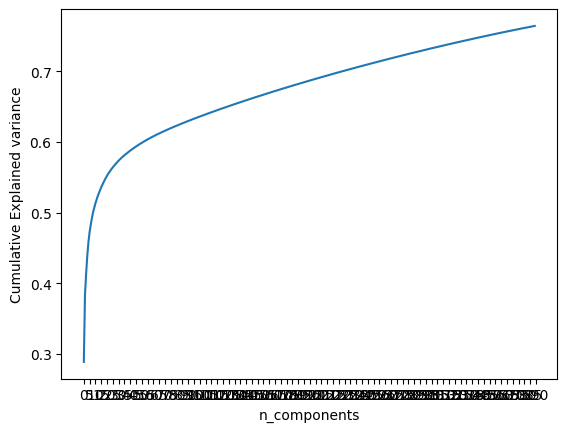

In [23]:
pca1.fit(x_train_standard)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('n_components')
plt.xticks(np.arange(0,395,step=5))
plt.ylabel('Cumulative Explained variance')
plt.show()

bad cumulative explained variance ratio (<0.8), akan dipakai metode dekomposisi selain PCA

In [24]:
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error
kpca=KernelPCA(fit_inverse_transform=True,n_jobs=-1)

In [25]:
def my_scorer(estimator, X, y=None):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1 * np.sqrt(mean_squared_error(X, X_preimage))

In [26]:
param_grid=[{
    "n_components":np.arange(50,400,50),
    "kernel":["poly","rbf","sigmoid","linear"]
}]

In [27]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(kpca,param_grid=param_grid,cv=None,scoring=my_scorer)

In [28]:
grid_search.fit(x_train_standard)

GridSearchCV(estimator=KernelPCA(fit_inverse_transform=True, n_jobs=-1),
             param_grid=[{'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
                          'n_components': array([ 50, 100, 150, 200, 250, 300, 350])}],
             scoring=<function my_scorer at 0x00000262F77A3A60>)

In [29]:
grid_search.best_params_

{'kernel': 'linear', 'n_components': 350}

kernel: poly, n_components:350

In [30]:
kpca1=KernelPCA(n_components=350,kernel='linear',random_state=42,n_jobs=-1)

In [31]:
x_train_preprocessed=kpca1.fit_transform(x_train_standard)
x_test_preprocessed=kpca1.transform(x_test_standard)
x_valid_preprocessed=kpca1.transform(x_valid_standard)
(x_train_preprocessed.shape,x_test_preprocessed.shape,x_valid_preprocessed.shape)

((3139, 350), (393, 350), (392, 350))

In [32]:
x_train_preprocessed=pd.DataFrame(x_train_preprocessed,columns=kpca1.get_feature_names_out())
x_test_preprocessed=pd.DataFrame(x_test_preprocessed,columns=kpca1.get_feature_names_out())
x_valid_preprocessed=pd.DataFrame(x_valid_preprocessed,columns=kpca1.get_feature_names_out())
display(x_train_preprocessed.head())
display(x_valid_preprocessed.head())
display(x_test_preprocessed.head())

,kernelpca0,kernelpca1,kernelpca2,kernelpca3,kernelpca4,kernelpca5,kernelpca6,kernelpca7,kernelpca8,kernelpca9,...,kernelpca340,kernelpca341,kernelpca342,kernelpca343,kernelpca344,kernelpca345,kernelpca346,kernelpca347,kernelpca348,kernelpca349
0,32.618301,4.074913,-5.171176,-3.840185,0.010416,3.604357,-0.504093,-6.065476,-6.541673,-2.925698,...,-0.365926,-0.760237,-0.862153,-0.252401,1.025961,1.168803,0.360901,-2.342640,1.000177,0.488514
1,0.403484,11.236075,-7.060425,7.122739,-8.197531,2.420547,-2.173166,1.236390,7.497614,-5.206123,...,0.465718,-0.274849,-0.260385,0.354674,-0.887589,-0.074043,0.500315,-0.445108,0.863572,-0.882388
2,-23.918636,-6.498062,-0.790212,7.586607,-0.197884,-1.168197,0.173771,0.098301,2.800087,3.882867,...,2.523885,0.940071,-1.796698,-1.874576,-0.904093,0.189207,2.044600,-0.814745,-0.523043,0.613967
3,22.548632,-0.496028,-9.577642,-1.400500,-2.076518,2.480967,0.884923,-1.917565,6.746142,-3.862280,...,1.430223,0.678779,-1.274420,-0.849744,-1.133255,1.014842,0.757644,-1.169394,0.393239,-0.247083
4,32.287174,-2.327037,-2.028624,2.606464,-4.226486,-9.472528,-1.797981,-1.908014,0.847353,-2.152979,...,-0.898932,-0.281924,0.476014,2.148057,0.669737,0.194370,0.516256,0.182464,-2.147825,0.536379


,kernelpca0,kernelpca1,kernelpca2,kernelpca3,kernelpca4,kernelpca5,kernelpca6,kernelpca7,kernelpca8,kernelpca9,...,kernelpca340,kernelpca341,kernelpca342,kernelpca343,kernelpca344,kernelpca345,kernelpca346,kernelpca347,kernelpca348,kernelpca349
0,-40.493587,-3.972809,1.519672,10.975012,-8.945199,7.290236,-0.354581,1.548213,-8.409535,-2.280658,...,0.422931,0.327833,0.322295,-0.329152,0.251449,0.421251,0.462065,-1.201303,0.061270,0.134070
1,-35.828434,-5.204414,0.841209,1.947994,-4.191784,-1.021303,-4.383009,-6.092917,1.064066,1.812839,...,0.120832,-0.487200,0.041298,-0.429284,0.032487,-1.046155,-0.306736,0.971795,1.515513,0.126401
2,32.673874,0.190536,-12.558957,1.602754,5.161372,-11.447177,-4.034750,0.492532,4.089815,-2.564500,...,-0.007006,0.044443,0.254598,-0.813180,0.247738,-0.304281,-0.813897,-0.751068,0.595510,1.165042
3,-18.554358,60.415684,8.818575,-10.945196,5.792937,-1.724560,1.194908,-3.306831,-0.716736,-1.747733,...,-0.160765,0.296311,0.250993,-0.368969,-0.016608,0.372426,-0.389531,-0.426239,-0.268625,0.083372
4,-6.327101,-9.028250,-6.097540,-1.595917,8.495798,-2.157443,6.994781,-2.696591,4.860077,3.488686,...,1.852916,0.002377,0.671801,0.510573,-0.536614,-1.047181,1.615179,-0.353445,0.136670,-0.592083


,kernelpca0,kernelpca1,kernelpca2,kernelpca3,kernelpca4,kernelpca5,kernelpca6,kernelpca7,kernelpca8,kernelpca9,...,kernelpca340,kernelpca341,kernelpca342,kernelpca343,kernelpca344,kernelpca345,kernelpca346,kernelpca347,kernelpca348,kernelpca349
0,-28.917381,-9.447851,4.613860,-3.094713,-0.904166,1.129704,-5.204555,0.579060,5.367782,0.182146,...,-0.651849,0.239839,-0.100290,-0.140469,-0.445685,-0.266244,0.313938,0.698219,0.542085,0.941197
1,43.434288,-6.838856,7.912168,-0.460526,-0.603493,6.299016,1.743667,-2.853281,-6.634459,2.765728,...,-0.200628,1.355589,-0.167789,1.322803,1.100249,0.105670,1.156776,-0.352670,-0.666445,-0.214782
2,-32.942444,-4.157052,0.933420,2.293461,-4.620335,3.698332,2.234248,-4.259671,1.036924,2.108672,...,0.146609,0.236602,0.449484,1.211943,1.078078,0.302428,-0.465042,0.436957,-1.264670,-0.094977
3,-28.238445,4.658405,-2.101820,17.007629,-5.755249,13.146125,2.856813,-0.929488,-5.400996,6.513495,...,1.104857,-0.862065,0.092364,-0.296491,1.537715,0.748177,-0.787860,0.752804,1.521601,1.149776
4,-5.546359,-12.169529,18.874626,0.663480,2.370333,-7.692126,-1.510382,-4.670187,6.023586,1.630718,...,-0.904565,0.706810,-0.721448,-0.826285,-0.424787,-1.286739,0.411383,-0.861464,-0.373247,-0.205685


In [33]:
from sklearn.preprocessing import LabelBinarizer
LB=LabelBinarizer()

In [34]:
y_train=LB.fit_transform(y_train)
y_train.shape

(3139, 3)

In [35]:
y_test=LB.fit_transform(y_test)
y_valid=LB.fit_transform(y_valid)
(y_test.shape,y_valid.shape)

((393, 3), (392, 3))

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1,random_state=42)

In [37]:
param_grid_rfc=[{
    'n_estimators':[100,300,500,700],
    'max_depth':[5,10,20],
    'max_leaf_nodes':[5,10,20]
}]

In [38]:
grid_search_rfc=GridSearchCV(rfc,param_grid_rfc,scoring='f1_macro',n_jobs=-1,cv=None)

In [39]:
grid_search_rfc.fit(x_train_preprocessed,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': [5, 10, 20],
                          'max_leaf_nodes': [5, 10, 20],
                          'n_estimators': [100, 300, 500, 700]}],
             scoring='f1_macro')

In [40]:
grid_search_rfc.best_params_

{'max_depth': 20, 'max_leaf_nodes': 20, 'n_estimators': 100}

max_depth=20, max_leaf_nodes=20, n_estimators=100

In [41]:
rfc1=RandomForestClassifier(n_estimators=100,max_depth=20,max_leaf_nodes=20,n_jobs=-1,random_state=42)

In [42]:
rfc1.fit(x_train_preprocessed,y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=20, n_jobs=-1,
                       random_state=42)

In [43]:
y_pred_val=rfc1.predict(x_valid_preprocessed)
y_pred_val.shape

(392, 3)

In [44]:
y_pred_test=rfc1.predict(x_test_preprocessed)
y_pred_test.shape

(393, 3)

In [45]:
from sklearn.metrics import multilabel_confusion_matrix,ConfusionMatrixDisplay,classification_report

In [46]:
LB.classes_

array(['Lung cancer, post-operation', 'Lung cancer, pre-operation',
       'Non-cancer control'], dtype='<U27')


Classification report
              precision    recall  f1-score   support

           0       1.00      0.19      0.32        16
           1       0.95      0.90      0.92       167
           2       0.96      0.95      0.95       210

   micro avg       0.96      0.90      0.93       393
   macro avg       0.97      0.68      0.73       393
weighted avg       0.96      0.90      0.92       393
 samples avg       0.90      0.90      0.90       393



Text(0.5, 1.0, 'Non-cancer control')

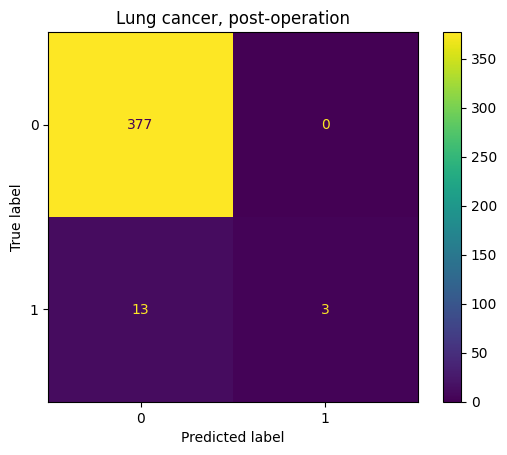

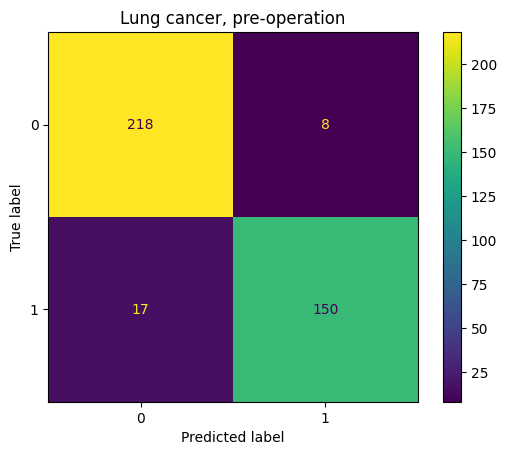

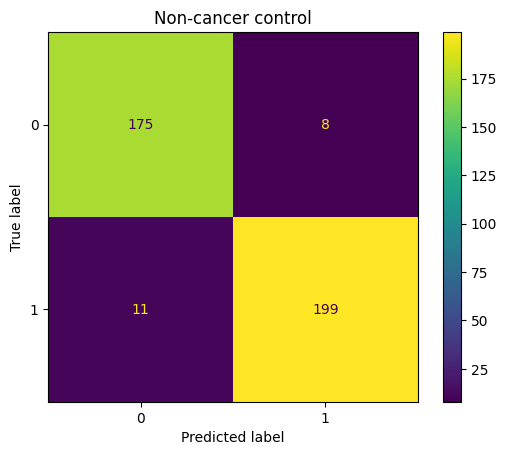

In [47]:
cm_test=multilabel_confusion_matrix(y_test,y_pred_test)
t1=ConfusionMatrixDisplay(cm_test[0])
t2=ConfusionMatrixDisplay(cm_test[1])
t3=ConfusionMatrixDisplay(cm_test[2])
print("\nClassification report")
print(classification_report(y_test, y_pred_test))
t1.plot()
t1.ax_.set_title('Lung cancer, post-operation')
t2.plot()
t2.ax_.set_title('Lung cancer, pre-operation')
t3.plot()
t3.ax_.set_title('Non-cancer control')


Classification report
              precision    recall  f1-score   support

           0       1.00      0.23      0.37        22
           1       0.98      0.95      0.96       148
           2       0.97      0.97      0.97       222

   micro avg       0.97      0.92      0.95       392
   macro avg       0.98      0.72      0.77       392
weighted avg       0.97      0.92      0.93       392
 samples avg       0.92      0.92      0.92       392



Text(0.5, 1.0, 'Non-cancer control')

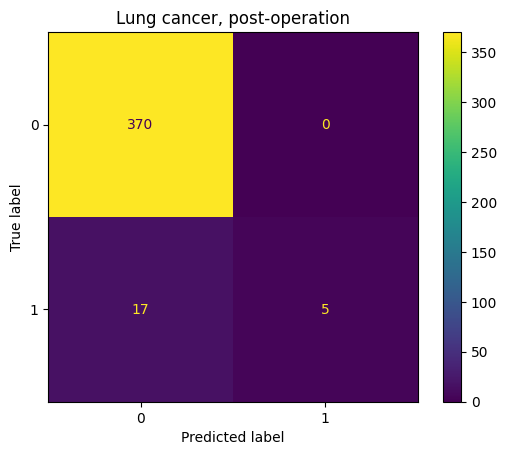

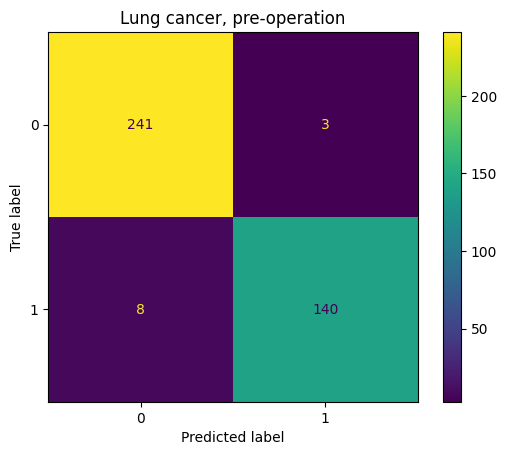

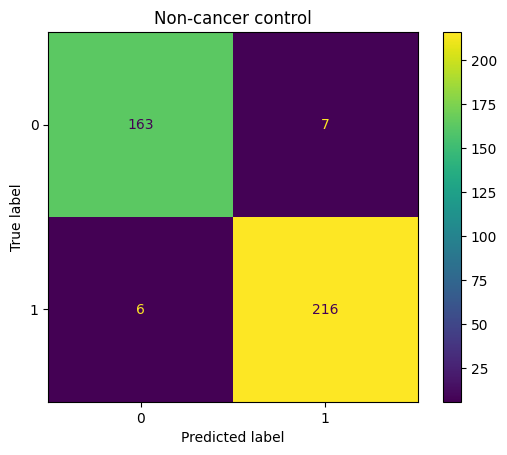

In [48]:
cm_valid=multilabel_confusion_matrix(y_valid,y_pred_val)
t1=ConfusionMatrixDisplay(cm_valid[0])
t2=ConfusionMatrixDisplay(cm_valid[1])
t3=ConfusionMatrixDisplay(cm_valid[2])
print("\nClassification report")
print(classification_report(y_valid, y_pred_val))
t1.plot()
t1.ax_.set_title('Lung cancer, post-operation')
t2.plot()
t2.ax_.set_title('Lung cancer, pre-operation')
t3.plot()
t3.ax_.set_title('Non-cancer control')

In [49]:
from sklearn.metrics import f1_score, accuracy_score
(f1_score(y_test,y_pred_test,average='macro'),accuracy_score(y_test,y_pred_test))

(0.731100949200154, 0.8956743002544529)

In [50]:
(f1_score(y_valid,y_pred_val,average='macro'),accuracy_score(y_valid,y_pred_val))

(0.7677853999796932, 0.9209183673469388)

In [51]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(random_state=42,n_jobs=-1)

In [53]:
param_grid_lgb=[{
    'n_estimators':[100,300,500],
    'max_depth':[5,10,20],
    'num_leaves':[25,50],
    'learning_rate':[1e-1,1e-2],
    'boosting_type':['gbdt']
}]

In [54]:
grid_search_lgb=GridSearchCV(lgb,param_grid_lgb,scoring='f1_macro',n_jobs=-1,cv=None)

In [55]:
grid_search_lgb.fit(x_train_preprocessed,LB.inverse_transform(y_train))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89250
[LightGBM] [Info] Number of data points in the train set: 3139, number of used features: 350
[LightGBM] [Info] Start training from score -3.095832
[LightGBM] [Info] Start training from score -0.919961
[LightGBM] [Info] Start training from score -0.586577
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

GridSearchCV(estimator=LGBMClassifier(n_jobs=-1, random_state=42), n_jobs=-1,
             param_grid=[{'boosting_type': ['gbdt'],
                          'learning_rate': [0.1, 0.01],
                          'max_depth': [5, 10, 20],
                          'n_estimators': [100, 300, 500],
                          'num_leaves': [25, 50]}],
             scoring='f1_macro')

In [56]:
grid_search_lgb.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth': 20,
 'n_estimators': 500,
 'num_leaves': 50}

'boosting_type': 'gbdt',
'learning_rate': 0.1,
'max_depth': 20,
'n_estimators': 500,
'num_leaves': 50

In [57]:
lgb1=LGBMClassifier('gbdt',learning_rate=1e-1,max_depth=20,n_estimators=500,num_leaves=50)

In [58]:
lgb1.fit(x_train_preprocessed,LB.inverse_transform(y_train))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89250
[LightGBM] [Info] Number of data points in the train set: 3139, number of used features: 350
[LightGBM] [Info] Start training from score -3.095832
[LightGBM] [Info] Start training from score -0.919961
[LightGBM] [Info] Start training from score -0.586577
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

LGBMClassifier(max_depth=20, n_estimators=500, num_leaves=50)

In [59]:
y_pred_val=lgb1.predict(x_valid_preprocessed)
y_pred_val=LB.transform(y_pred_val)
y_pred_val.shape

(392, 3)

In [60]:
y_pred_test=lgb1.predict(x_test_preprocessed)
y_pred_test=LB.transform(y_pred_test)
y_pred_test.shape

(393, 3)


Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.99      0.99      0.99       167
           2       0.99      0.99      0.99       210

   micro avg       0.99      0.99      0.99       393
   macro avg       0.99      0.99      0.99       393
weighted avg       0.99      0.99      0.99       393
 samples avg       0.99      0.99      0.99       393



Text(0.5, 1.0, 'Non-cancer control')

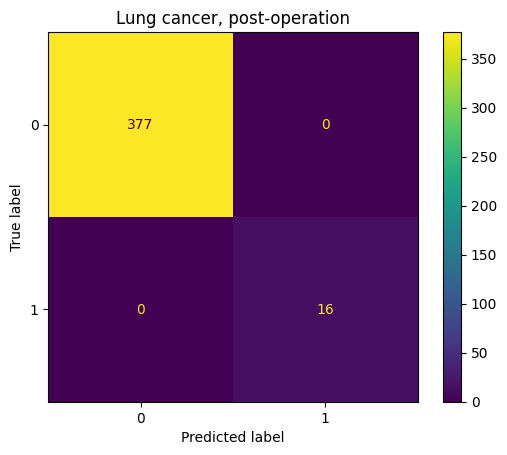

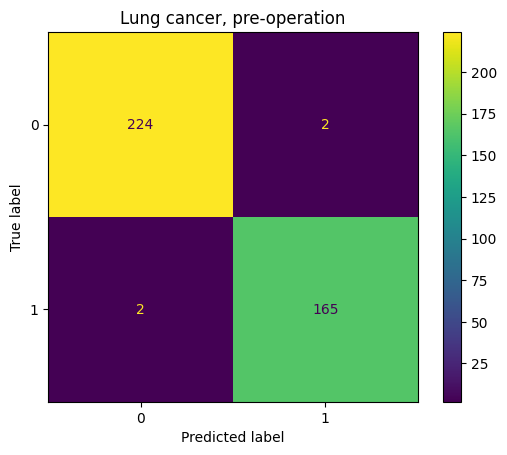

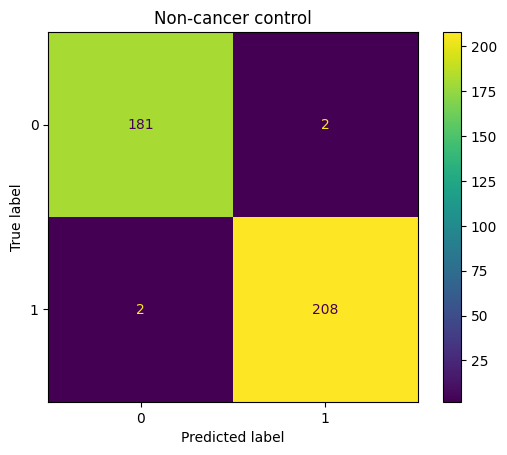

In [61]:
cm_test=multilabel_confusion_matrix(y_test,y_pred_test)
t1=ConfusionMatrixDisplay(cm_test[0])
t2=ConfusionMatrixDisplay(cm_test[1])
t3=ConfusionMatrixDisplay(cm_test[2])
print("\nClassification report")
print(classification_report(y_test, y_pred_test))
t1.plot()
t1.ax_.set_title('Lung cancer, post-operation')
t2.plot()
t2.ax_.set_title('Lung cancer, pre-operation')
t3.plot()
t3.ax_.set_title('Non-cancer control')


Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.99      1.00      0.99       148
           2       1.00      0.99      1.00       222

   micro avg       0.99      0.99      0.99       392
   macro avg       1.00      1.00      1.00       392
weighted avg       0.99      0.99      0.99       392
 samples avg       0.99      0.99      0.99       392



Text(0.5, 1.0, 'Non-cancer control')

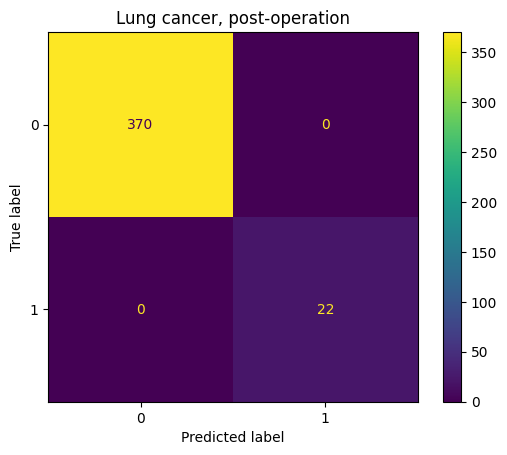

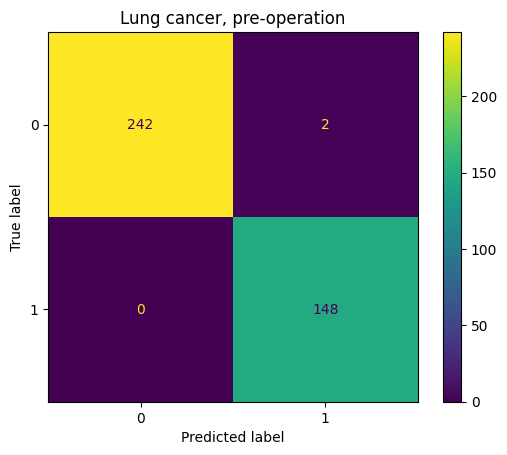

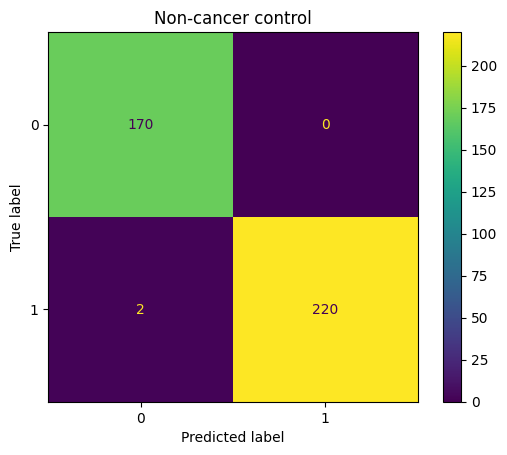

In [62]:
cm_valid=multilabel_confusion_matrix(y_valid,y_pred_val)
t1=ConfusionMatrixDisplay(cm_valid[0])
t2=ConfusionMatrixDisplay(cm_valid[1])
t3=ConfusionMatrixDisplay(cm_valid[2])
print("\nClassification report")
print(classification_report(y_valid, y_pred_val))
t1.plot()
t1.ax_.set_title('Lung cancer, post-operation')
t2.plot()
t2.ax_.set_title('Lung cancer, pre-operation')
t3.plot()
t3.ax_.set_title('Non-cancer control')

In [63]:
from sklearn.metrics import f1_score, accuracy_score
(f1_score(y_test,y_pred_test,average='macro'),accuracy_score(y_test,y_pred_test))

(0.992833380857333, 0.989821882951654)

In [64]:
(f1_score(y_valid,y_pred_val,average='macro'),accuracy_score(y_valid,y_pred_val))

(0.9962545679087329, 0.9948979591836735)

In [65]:
from sklearn.svm import SVC
svc=SVC(random_state=42)

In [66]:
param_grid_svc=[{
    'C':[0.1,0.2,0.4,0.6,0.8,1,5,10],
    'kernel':['poly','rbf','sigmoid'],
    'degree':[3,5],
    'gamma':['scale','auto']
}]

In [67]:
grid_search_svc=GridSearchCV(svc,param_grid_svc,scoring='f1_macro',n_jobs=-1,cv=None)

In [68]:
grid_search_svc.fit(x_train_preprocessed,LB.inverse_transform(y_train))

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.4, 0.6, 0.8, 1, 5, 10],
                          'degree': [3, 5], 'gamma': ['scale', 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             scoring='f1_macro')

In [69]:
grid_search_svc.best_params_

{'C': 5, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

'C': 5, 'degree': 3, 'kernel': 'rbf', 'gamma':'scale'

In [70]:
svc1=SVC(C=5,degree=3,kernel='rbf',random_state=42,gamma='scale')

In [71]:
svc1.fit(x_train_preprocessed,LB.inverse_transform(y_train))

SVC(C=5, random_state=42)

In [72]:
y_pred_val=svc1.predict(x_valid_preprocessed)
y_pred_val=LB.transform(y_pred_val)
y_pred_val.shape

(392, 3)

In [73]:
y_pred_test=svc1.predict(x_test_preprocessed)
y_pred_test=LB.transform(y_pred_test)
y_pred_test.shape

(393, 3)


Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.99      1.00      0.99       167
           2       1.00      0.99      1.00       210

   micro avg       0.99      0.99      0.99       393
   macro avg       1.00      1.00      1.00       393
weighted avg       0.99      0.99      0.99       393
 samples avg       0.99      0.99      0.99       393



Text(0.5, 1.0, 'Non-cancer control')

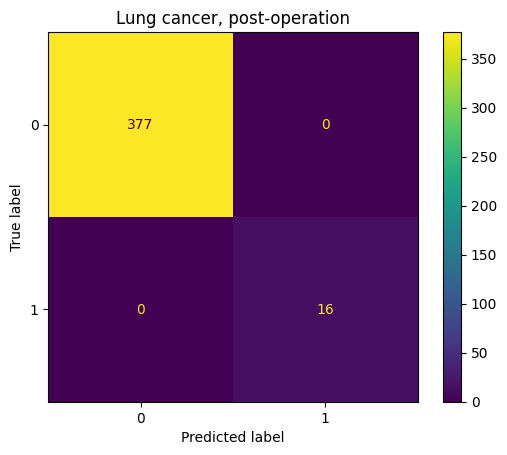

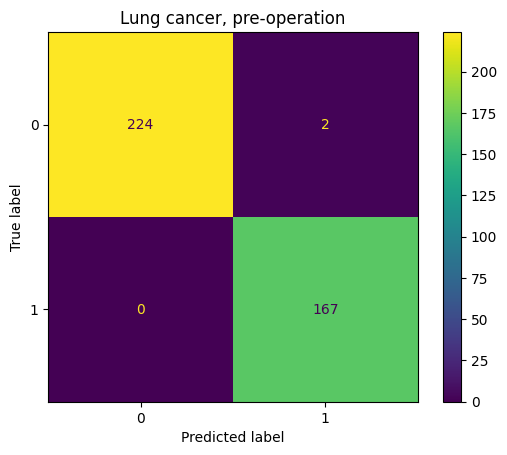

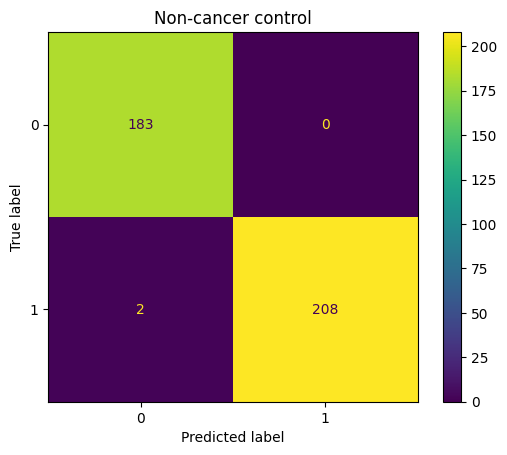

In [74]:
cm_test=multilabel_confusion_matrix(y_test,y_pred_test)
t1=ConfusionMatrixDisplay(cm_test[0])
t2=ConfusionMatrixDisplay(cm_test[1])
t3=ConfusionMatrixDisplay(cm_test[2])
print("\nClassification report")
print(classification_report(y_test, y_pred_test))
t1.plot()
t1.ax_.set_title('Lung cancer, post-operation')
t2.plot()
t2.ax_.set_title('Lung cancer, pre-operation')
t3.plot()
t3.ax_.set_title('Non-cancer control')


Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00       148
           2       1.00      1.00      1.00       222

   micro avg       1.00      1.00      1.00       392
   macro avg       1.00      1.00      1.00       392
weighted avg       1.00      1.00      1.00       392
 samples avg       1.00      1.00      1.00       392



Text(0.5, 1.0, 'Non-cancer control')

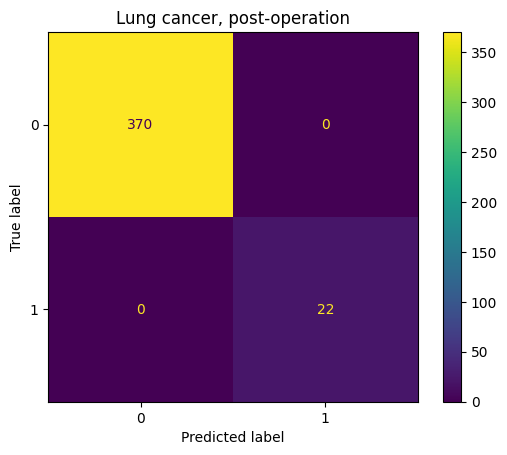

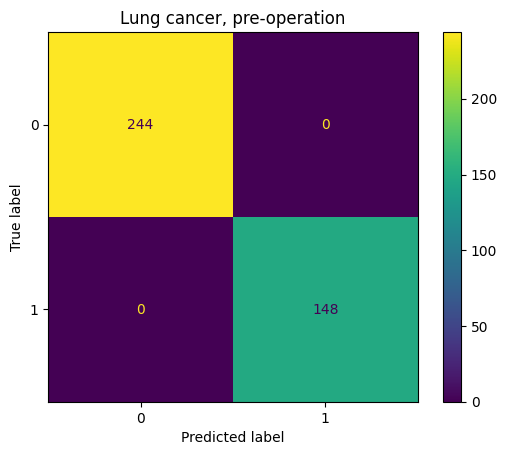

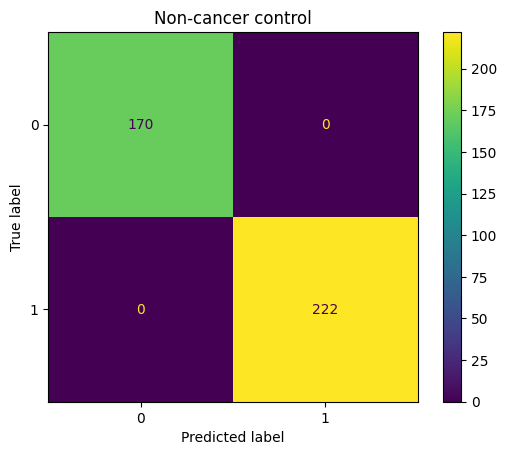

In [75]:
cm_valid=multilabel_confusion_matrix(y_valid,y_pred_val)
t1=ConfusionMatrixDisplay(cm_valid[0])
t2=ConfusionMatrixDisplay(cm_valid[1])
t3=ConfusionMatrixDisplay(cm_valid[2])
print("\nClassification report")
print(classification_report(y_valid, y_pred_val))
t1.plot()
t1.ax_.set_title('Lung cancer, post-operation')
t2.plot()
t2.ax_.set_title('Lung cancer, pre-operation')
t3.plot()
t3.ax_.set_title('Non-cancer control')

In [76]:
from sklearn.metrics import f1_score, accuracy_score
(f1_score(y_test,y_pred_test,average='macro'),accuracy_score(y_test,y_pred_test))

(0.9964209766841345, 0.9949109414758269)

In [77]:
(f1_score(y_valid,y_pred_val,average='macro'),accuracy_score(y_valid,y_pred_val))

(1.0, 1.0)

In [78]:
import tensorflow as tf
from tensorflow import keras

In [79]:
train_dataset=tf.data.Dataset.from_tensor_slices((x_train_standard,y_train)).batch(36).prefetch(tf.data.AUTOTUNE)
test_dataset=tf.data.Dataset.from_tensor_slices((x_test_standard,y_test)).batch(36).prefetch(tf.data.AUTOTUNE)
valid_dataset=tf.data.Dataset.from_tensor_slices((x_valid_standard,y_valid)).batch(36).prefetch(tf.data.AUTOTUNE)

In [80]:
def block_1(x,filter):
    x_skip=x
    x=keras.layers.Conv1D(filter,3,padding='same')(x)
    x=keras.layers.BatchNormalization()(x)
    x=keras.layers.Activation('relu')(x)
    x=keras.layers.Conv1D(filter,3,padding='same')(x)
    x=keras.layers.BatchNormalization()(x)
    x=keras.layers.Add()([x_skip,x])
    return x

In [81]:
def block_2(x,filter):
    x_skip=x
    x_skip=keras.layers.Conv1D(filter,1,2,padding='same',activation='linear')(x_skip)
    x=keras.layers.Conv1D(filter,3,2,padding='same')(x)
    x=keras.layers.BatchNormalization()(x)
    x=keras.layers.Activation('relu')(x)
    x=keras.layers.Conv1D(filter,3,padding='same')(x)
    x=keras.layers.BatchNormalization()(x)
    x=keras.layers.Add()([x_skip,x])
    return x


In [82]:
def build_model():
    inputs=keras.Input((X.shape[1],))
    reshape=keras.layers.Reshape((X.shape[1],1))(inputs)

    x0=keras.layers.Conv1D(64,
                           kernel_size=7,
                           strides=2,
                           padding='same')(reshape)
    norm0=keras.layers.BatchNormalization()(x0)
    relu0=keras.layers.Activation('relu')(norm0)
    pool0=keras.layers.MaxPooling1D(3,strides=2,padding='same')(relu0)

    conv_1=block_1(pool0,64)
    conv_2=block_1(conv_1,64)
    conv_3=block_1(conv_2,64)

    conv_4=block_2(conv_3,128)
    conv_5=block_1(conv_4,128)
    conv_6=block_1(conv_5,128)
    conv_7=block_1(conv_6,128)

    conv_8=block_2(conv_7,256)
    conv_9=block_1(conv_8,256)
    conv_10=block_1(conv_9,256)
    conv_11=block_1(conv_10,256)
    conv_12=block_1(conv_11,256)
    conv_13=block_1(conv_12,256)

    conv_14=block_2(conv_13,512)
    conv_15=block_1(conv_14,512)
    conv_16=block_1(conv_15,512)

    global_pooling=keras.layers.GlobalAveragePooling1D()(conv_16)
    x=keras.layers.Dense(1000,activation='relu')(global_pooling)
    output=keras.layers.Dense(3,activation='softmax')(x)

    model=keras.Model(inputs=inputs,outputs=output)
    opt=keras.optimizers.Adam(learning_rate=8e-4)

    model.compile(opt,
                  loss=keras.losses.CategoricalCrossentropy(),
                  metrics=[keras.metrics.CategoricalAccuracy()])
    return model

In [83]:
model=build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2565)]       0           []                               
                                                                                                  
 reshape (Reshape)              (None, 2565, 1)      0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 1283, 64)     512         ['reshape[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 1283, 64)    256         ['conv1d[0][0]']                 
 alization)                                                                                   

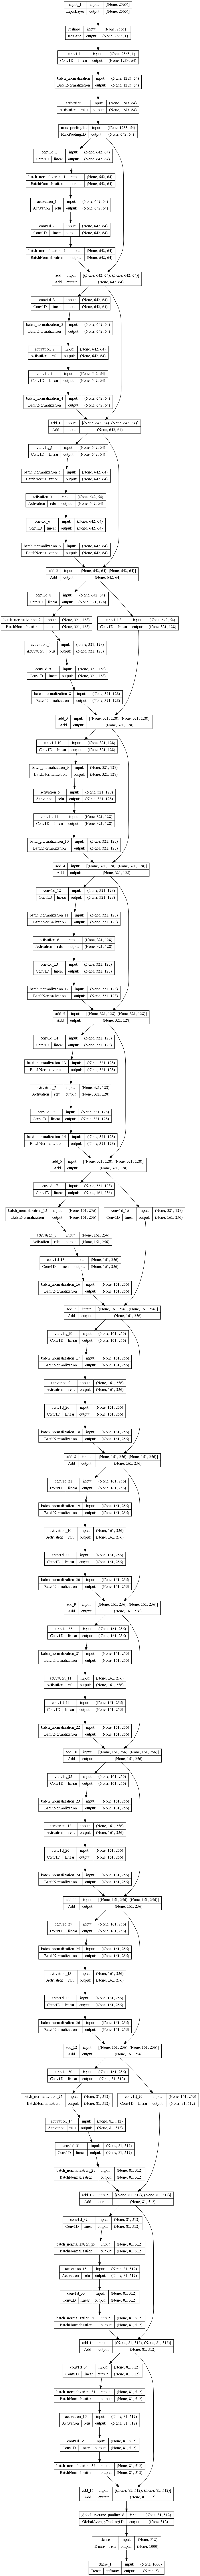

In [84]:
keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True)

In [85]:
reduce_lr=keras.callbacks.ReduceLROnPlateau('val_loss',factor=0.5,patience=3,verbose=1)
early_stop=keras.callbacks.EarlyStopping('val_loss',patience=10,verbose=1,restore_best_weights=True)

In [86]:
history=model.fit(train_dataset,
                  epochs=200,
                  callbacks=[reduce_lr,early_stop],
                  validation_data=valid_dataset)

Epoch 1/200
88/88 [==============================] - 25s 169ms/step - loss: 0.8092 - categorical_accuracy: 0.8659 - val_loss: 4.7167 - val_categorical_accuracy: 0.3776 - lr: 8.0000e-04
Epoch 2/200
88/88 [==============================] - 14s 154ms/step - loss: 0.1922 - categorical_accuracy: 0.9401 - val_loss: 3.9416 - val_categorical_accuracy: 0.3776 - lr: 8.0000e-04
Epoch 3/200
88/88 [==============================] - 14s 154ms/step - loss: 0.1039 - categorical_accuracy: 0.9634 - val_loss: 0.9637 - val_categorical_accuracy: 0.6020 - lr: 8.0000e-04
Epoch 4/200
88/88 [==============================] - 14s 154ms/step - loss: 0.0515 - categorical_accuracy: 0.9822 - val_loss: 0.2133 - val_categorical_accuracy: 0.9362 - lr: 8.0000e-04
Epoch 5/200
88/88 [==============================] - 14s 154ms/step - loss: 0.0604 - categorical_accuracy: 0.9793 - val_loss: 0.3798 - val_categorical_accuracy: 0.8954 - lr: 8.0000e-04
Epoch 6/200
88/88 [==============================] - 14s 154ms/step - loss:

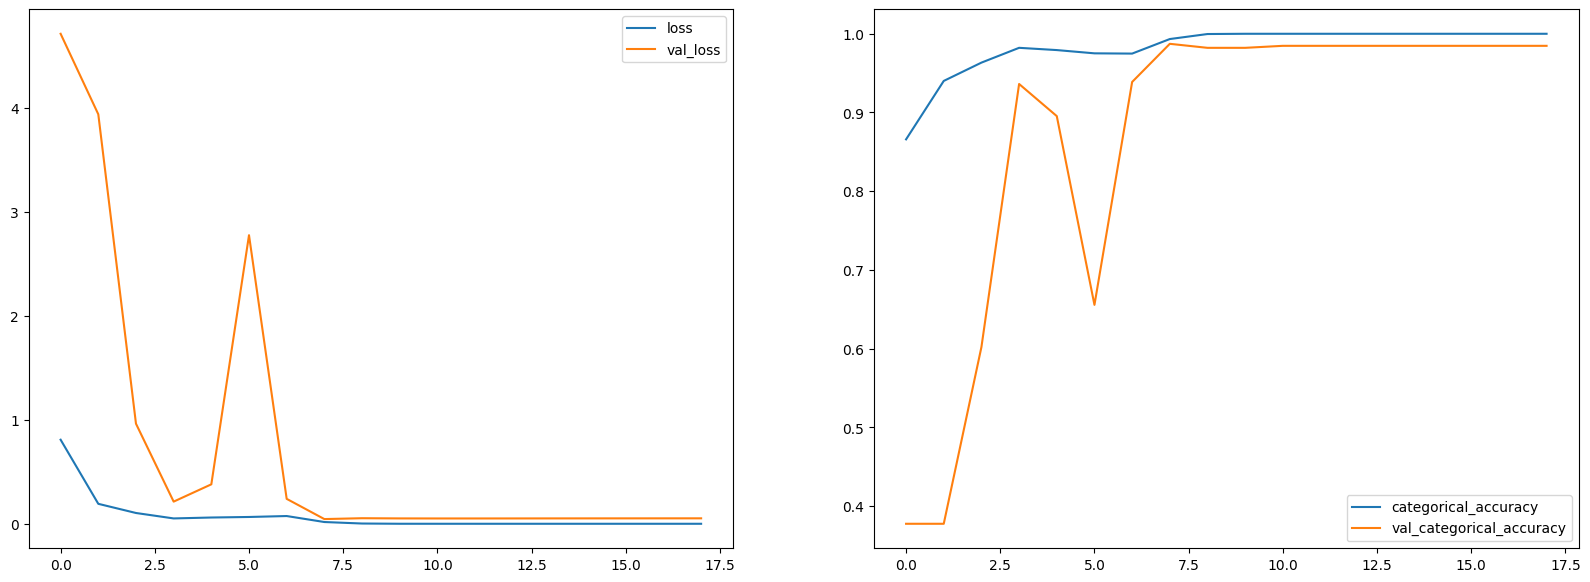

In [87]:
_, ax = plt.subplots(1, 2, figsize=(20,7))
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy=history.history['categorical_accuracy']
val_accuracy=history.history['val_categorical_accuracy']
epochs = range(len(loss))

ax[0].plot(epochs, loss)
ax[0].plot(epochs, val_loss)
ax[0].legend(['loss', 'val_loss'], loc='upper right')

ax[1].plot(epochs, accuracy)
ax[1].plot(epochs, val_accuracy)
ax[1].legend(['categorical_accuracy', 'val_categorical_accuracy'], loc='lower right')

In [88]:
y_pred_val=model.predict(valid_dataset)
y_pred_val=np.round(y_pred_val)

11/11 [==============================] - 2s 77ms/step


In [89]:
y_pred_test=model.predict(test_dataset)
y_pred_test=np.round(y_pred_test)

11/11 [==============================] - 1s 59ms/step


In [90]:
y_pred_val.shape,y_pred_test.shape

((392, 3), (393, 3))


Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.96      0.95       167
           2       0.97      0.95      0.96       210

   micro avg       0.96      0.96      0.96       393
   macro avg       0.97      0.97      0.97       393
weighted avg       0.96      0.96      0.96       393
 samples avg       0.96      0.96      0.96       393



Text(0.5, 1.0, 'Non-cancer control')

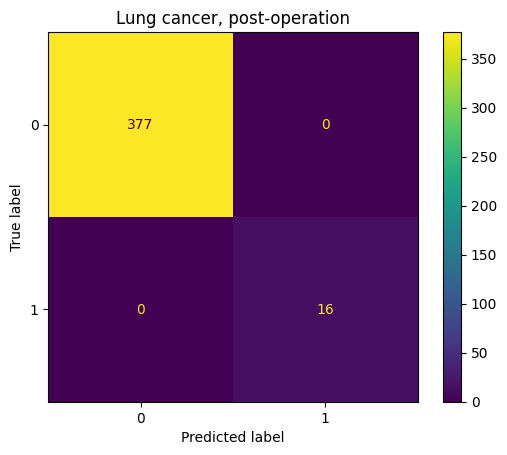

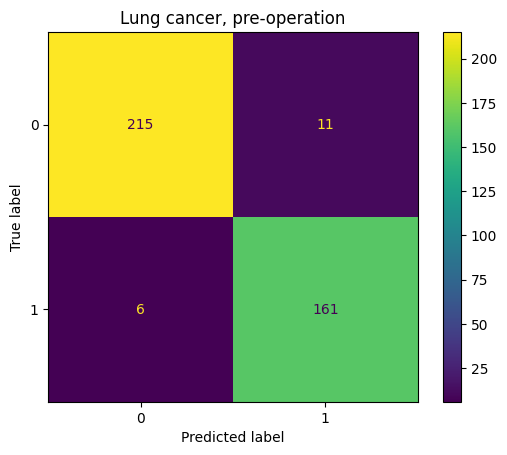

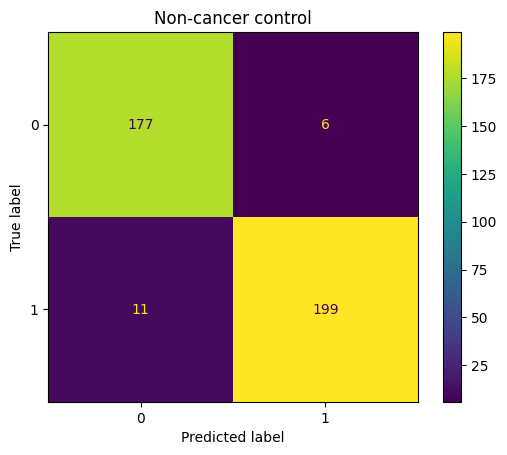

In [91]:
cm_test=multilabel_confusion_matrix(y_test,y_pred_test)
t1=ConfusionMatrixDisplay(cm_test[0])
t2=ConfusionMatrixDisplay(cm_test[1])
t3=ConfusionMatrixDisplay(cm_test[2])
print("\nClassification report")
print(classification_report(y_test, y_pred_test))
t1.plot()
t1.ax_.set_title('Lung cancer, post-operation')
t2.plot()
t2.ax_.set_title('Lung cancer, pre-operation')
t3.plot()
t3.ax_.set_title('Non-cancer control')


Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.97      0.99      0.98       148
           2       1.00      0.98      0.99       222

   micro avg       0.99      0.99      0.99       392
   macro avg       0.99      0.99      0.99       392
weighted avg       0.99      0.99      0.99       392
 samples avg       0.99      0.99      0.99       392



Text(0.5, 1.0, 'Non-cancer control')

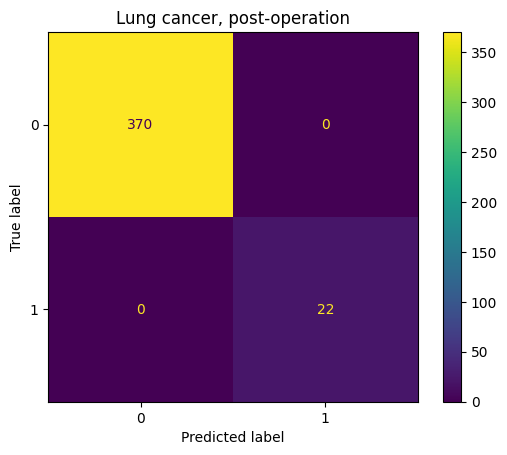

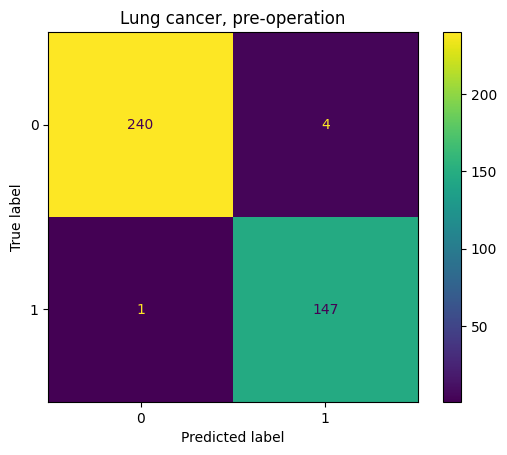

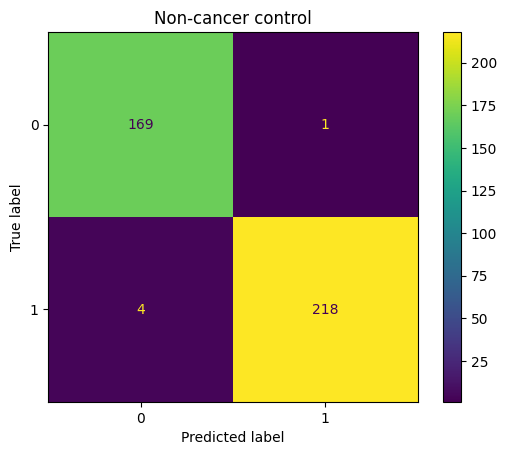

In [92]:
cm_valid=multilabel_confusion_matrix(y_valid,y_pred_val)
t1=ConfusionMatrixDisplay(cm_valid[0])
t2=ConfusionMatrixDisplay(cm_valid[1])
t3=ConfusionMatrixDisplay(cm_valid[2])
print("\nClassification report")
print(classification_report(y_valid, y_pred_val))
t1.plot()
t1.ax_.set_title('Lung cancer, post-operation')
t2.plot()
t2.ax_.set_title('Lung cancer, pre-operation')
t3.plot()
t3.ax_.set_title('Non-cancer control')

In [93]:
from sklearn.metrics import f1_score, accuracy_score
(f1_score(y_test,y_pred_test,average='macro'),accuracy_score(y_test,y_pred_test))

(0.9696295506509816, 0.9567430025445293)

In [94]:
(f1_score(y_valid,y_pred_val,average='macro'),accuracy_score(y_valid,y_pred_val))

(0.990646574497506, 0.9872448979591837)

In [95]:
model.save('Conv1DRes34.h5')